In [1]:
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np
import cv2
import pathlib

from mtcnn import MTCNN

import tensorflow as tf

Using TensorFlow backend.
/Users/xavier/opt/anaconda3/envs/kaggle-melanoma20/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/xavier/opt/anaconda3/envs/kaggle-melanoma20/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/xavier/opt/anaconda3/envs/kaggle-melanoma20/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype

In [2]:
IMGPATH = './images/'

In [3]:
imgpath = pathlib.Path(IMGPATH)

In [91]:
files = [name for name in imgpath.glob('*.jpeg')]

In [92]:
# img = Image.open(files[0])

files

[PosixPath('images/Xavier-7.jpeg'),
 PosixPath('images/Xavier-13.jpeg'),
 PosixPath('images/Cesar-1.jpeg'),
 PosixPath('images/Pere.jpeg'),
 PosixPath('images/Xavier-12.jpeg'),
 PosixPath('images/Xavier-6.jpeg'),
 PosixPath('images/Xavier-1.jpeg'),
 PosixPath('images/Xavier-14.jpeg'),
 PosixPath('images/Eduard-2.jpeg'),
 PosixPath('images/Varvara-1.jpeg'),
 PosixPath('images/Varvara-2.jpeg'),
 PosixPath('images/Xavier-3.jpeg'),
 PosixPath('images/Eduard-1.jpeg'),
 PosixPath('images/Nicolas.jpeg'),
 PosixPath('images/Xavier-2.jpeg'),
 PosixPath('images/Varvara-3.jpeg'),
 PosixPath('images/Xavier-11.jpeg'),
 PosixPath('images/Xavier-5.jpeg'),
 PosixPath('images/Xavier-9.jpeg'),
 PosixPath('images/Cesar-2.jpeg'),
 PosixPath('images/Xavier-8.jpeg'),
 PosixPath('images/Xavier-4.jpeg'),
 PosixPath('images/Xavier-10.jpeg')]

In [6]:
detector = MTCNN()

In [15]:
kerasPath = './models/keras-facenet/model/facenet_keras.h5'
kerasWeights = './models/keras-facenet/weights/facenet_keras_weights.h5'

keras_model = tf.keras.models.load_model(kerasPath)
keras_model.load_weights(kerasWeights)

In [156]:
import numpy as np
def distance_1 (firstimg, secondimg):
    return np.sum(np.square(np.subtract(firstimg,secondimg)))
    
    
# def distance(emb1, emb2):

#     diff = np.subtract(emb1, emb2)
#     return np.sum(np.square(diff))

In [178]:
def img_to_encoding(image_path, model):
    img1 = cv2.imread(image_path, 1)
    img = img1[...,::-1]
    img = cv2.resize(img, (160,160))
#     img = np.around(np.transpose(img, (2,0,1))/255.0, decimals=12)
    img = np.around(img/255.0, decimals=12)
    x_train = np.array([img])
    embedding = model.predict_on_batch(x_train)
    return embedding

In [180]:
img_to_encoding((files[0].as_posix()), keras_model)

SystemError: <built-in function imread> returned NULL without setting an error

In [191]:
def img_to_enc (file, model, padding=0, shape=(160,160), detector=MTCNN()):
    img = cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2RGB)
    (w,h,dw,dh) = detector.detect_faces(np.array(img))[0]['box']
    
    if padding:
        w -= padding
        h -= padding
        dw += 2*padding
        dh += 2*padding
                    
    imgcut = img[h:(h+dh), w:(w+dw)]
    resized = cv2.resize(imgcut, (160,160))
    
    img = np.around(resized/255.0, decimals=12)
    x_tr = np.array([img])
    emb = model.predict(x_tr)
    return emb

In [117]:
def standarize(face):	# standardize pixel values across channels (global)
	mean, std = face.mean(), face.std()
	return (face - mean) / std




In [161]:
rsz1 = get_face(files[0].as_posix())
rsz2 = get_face(files[1].as_posix())

In [195]:
enc0 = img_to_enc(files[0].as_posix(), keras_model, padding=30)
enc1 = img_to_enc(files[2].as_posix(), keras_model, padding=30)

In [196]:
from scipy.spatial import distance


print(distance.euclidean(enc0, enc1))
print(distance_1(enc0,enc1))

16.13707733154297
260.40533


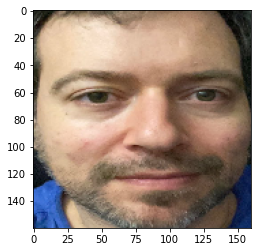

In [159]:
plt.imshow(np.squeeze(rsz1, axis=0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


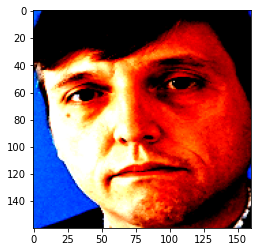

In [160]:
plt.imshow(np.squeeze(rsz2, axis=0))

In [71]:
enc0 /= np.max(np.abs(enc0),axis=0)
enc1 /= np.max(np.abs(enc1),axis=0)



In [72]:
distance(enc0,enc1)

(9.797959, 9.797959)